## BMI 203 Final Project: Making autoencoder and testing on the digits dataset

This Jupyter notebook uses the neural network API developed for this assignment to encode and reconstruct input from the "digits" dataset.

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
from nn import nn, preprocess, io
import matplotlib.pyplot as plt

/Users/yaenchen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%load_ext autoreload
# reloads the file constantly so you don't need to reset
%autoreload 2

#### Step 1: Load the digits dataset
Each class (10 total) reflects a digit. There are 1797 8x8 images (64 pixels), and each image is a hand-written digit.

In [3]:
digits = load_digits()
print("Shape of the digits data:", np.shape(digits.data))

Shape of the digits data: (1797, 64)


#### Step 2: Split data into training and testing
80% of the data will be used for training, while 20% will be used for testing.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits["data"], digits["data"], test_size = 0.2, random_state = 0)
X_train

array([[ 0.,  0.,  0., ..., 16., 16.,  6.],
       [ 0.,  3., 12., ..., 16.,  2.,  0.],
       [ 0.,  1., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

#### Step 2: Determine optimal parameters
An instance of my autoencoder was generated with MSE as the loss function since the output is not binary (thus, BCE would not be appropriate). Other parameters for use in my autoencoder were determined through a brief grid search with various learning rates, batch sizes, and epochs.

After grid search, the optimal parameters were determined to be a **learning rate of 0.0001, batch size of 50, and 500 epochs** based on minimal loss values.

My neural network consists of 2 layers, which takes an input and encodes it into a lower-dimensional latent space to decode and reconstruct it. The autoencoder is 64x16x64.

In [31]:
# do a small grid search
# initialize parameters to test
lr_params = [0.01, 0.001, 0.0001, 0.00001]
batch_size_params = [10, 50, 100, 200]
epoch_params = [10, 50, 100, 200, 500]
# initialize lists to store losses and the optimal parameters
losses = []
optimal_params = []

# do grid search
for lr in lr_params:
    for batch_size in batch_size_params:
        for epoch in epoch_params:
            autoencoder = nn.NeuralNetwork(arch, lr=lr, batch_size=batch_size, epochs=epoch, seed=42, loss_function = "mse")
            train_loss, test_loss = autoencoder.fit(X_train, y_train, X_test, y_test)
            losses.append(min((test_loss)))
            optimal_params.append([lr, batch_size, epoch])

In [32]:
#print the optimal parameters (learning rate, batch size, epochs)
optimal_params[losses.index(min(losses))]

[0.0001, 50, 500]

#### Step 3: Train my autoencoder using optimal parameters

In [33]:
# initialize neural network architecture using the optimal parameters
arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
       {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}]
# initialize autoencoder
autoencoder = nn.NeuralNetwork(arch, lr = 0.0001, seed = 42, batch_size = 50, epochs = 500, loss_function = "mse")

In [34]:
# train autoencoder on the training data
train_loss, test_loss = autoencoder.fit(X_train, y_train, X_test, y_test)

#### Step 4: Plot losses per epoch

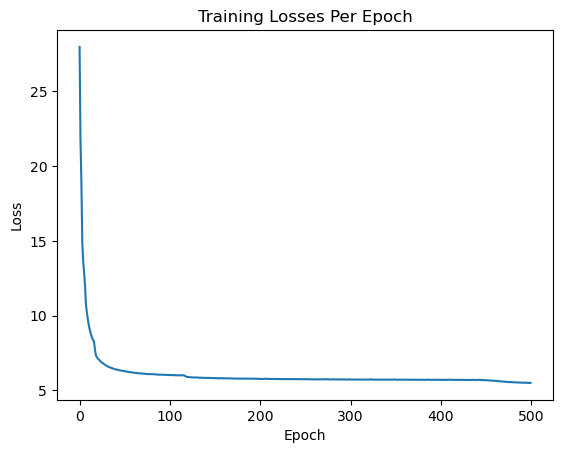

In [49]:
plt.figure()
plt.plot(train_loss)
plt.title("Training Losses Per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

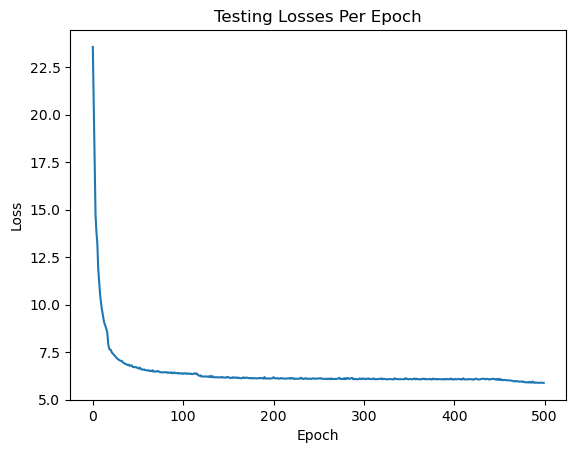

In [51]:
plt.figure()
plt.plot(test_loss)
plt.title("Testing Losses Per Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#### Step 5: Quantify reconstruction error

In [48]:
# make predictions using test data
preds = autoencoder.predict(X_test)

In [47]:
# get the mean squared error of the test set
print("Mean squred error of the test data:", np.mean((X_test - preds) ** 2))

Mean squred error of the test data: 5.88449100481224
